# Spam VS Non-Spam emails

Download the dataset on spam vs. non-spam emails from the following URL: http://archive.ics.uci.edu/ml/datasets/Spambase. Specifically, (i) file “spambase.data” contains the actual data, and (ii) files “spambase.names” and “spambase.DOCUMENTATION” contain the description of the data.

This dataset has 4601 records, each record representing a different email message. Each record is described with 58 attributes (indicated in the aforementioned .names file): attributes 1-57 represent various content-based characteristics already extracted from each email message (related to the frequency of certain words or certain punctuation symbols in a message as well as to the usage of capital letters in a message), and the last attribute represents the class label for each message (spam or non-spam).

Task: The general task for this assignment is to build two different models for detecting spam messages (based on the email characteristics that are given):

The best possible model that you can build in terms of the overall predictive accuracy (i.e., not taking any cost information into account)


### Loading and Exploring the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn import tree # Decision Tree
from sklearn import neighbors # K Nearest Neighbor
from sklearn.svm import SVC # SVM Classification
from sklearn.neural_network import MLPClassifier # Neural Network Classification
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold,train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler # Normalization Min-Max
from sklearn.preprocessing import StandardScaler # Normalization Min-Max
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline # Making Pipelines
import xgboost
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings 
warnings.filterwarnings('ignore')

## Loading Data and Data Exploration

In [2]:
# Reading the data into DataFrame

df = pd.read_csv('spambase.data', header=None, names= ["wfmake", "wfaddress", "wfall", "wf3d", "wfour", "wfover", "wfremove", "wfinternet", 
                "wforder", "wfmail", "wfreceive", "wfwill", "wfpeople", "wfreport", "wfaddresses", 
                "wffree", "wfbusiness", "wfemail", "wfyou", "wfcredit", "wfyour", "wffont", "wf000", 
                "wfmoney", "wfhp", "wfhpl", "wfgeorge", "wf650", "wflab", "wflabs", "wftelnet", "wf857", 
                "wfdata", "wf415", "wf85", "wftechnology", "wf1999", "wfparts", "wfpm", "wfdirect", "wfcs", 
                "wfmeeting", "wforiginal", "wfproject", "wfre", "wfedu", "wftable", "wfconference", 
                'cf%3B', 'cf#28', 'cf%5B', 'cf%21', 'cf%24', 'cf%23',  
                "cap_avg","cap_longest","cap_total","class"]) 

In [3]:
# Checking the column types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   wfmake        4601 non-null   float64
 1   wfaddress     4601 non-null   float64
 2   wfall         4601 non-null   float64
 3   wf3d          4601 non-null   float64
 4   wfour         4601 non-null   float64
 5   wfover        4601 non-null   float64
 6   wfremove      4601 non-null   float64
 7   wfinternet    4601 non-null   float64
 8   wforder       4601 non-null   float64
 9   wfmail        4601 non-null   float64
 10  wfreceive     4601 non-null   float64
 11  wfwill        4601 non-null   float64
 12  wfpeople      4601 non-null   float64
 13  wfreport      4601 non-null   float64
 14  wfaddresses   4601 non-null   float64
 15  wffree        4601 non-null   float64
 16  wfbusiness    4601 non-null   float64
 17  wfemail       4601 non-null   float64
 18  wfyou         4601 non-null 

Almost all the predictor columns are continuous. The response variable 'class' is binary with - 0: Non Spam 1: Spam

In [4]:
# Checking the data distribution

df.describe()

,wfmake,wfaddress,wfall,wf3d,wfour,wfover,wfremove,wfinternet,wforder,wfmail,...,cf%3B,cf#28,cf%5B,cf%21,cf%24,cf%23,cap_avg,cap_longest,cap_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [5]:
# Checking class balance

df['class'].value_counts()

0    2788
1    1813
Name: class, dtype: int64

<AxesSubplot:ylabel='Spam 1   Non-Spam 0'>

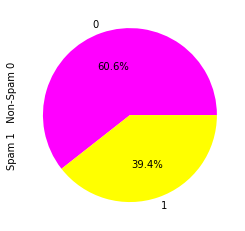

In [66]:
df.groupby('class').size().plot(kind='pie',
                                y = "class",
                                cmap='spring',
                                label = "Spam 1   Non-Spam 0",
                                autopct='%1.1f%%')

The records of Non-Spam (Class 0) is more than the number of Spam (Class 1), with 60:40 as the ratio. Even though it's not a huge difference, we should take into account of the class imbalance when we are building the model afterwards.

## Create train and test data

I will use a train and test dataset with 80:20 split

In [8]:
# Seperating predictor and response variables

x = df.drop(['class'], axis = 1)
y = df['class']

In [9]:
# Splitting test and train sets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=42)

A test set with 20% of the data is kept for final evaluation

## Models Training

We will train five different ML models and use Cross Validation to pick the best performing model.

1. Decision Tree
2. K Nearest Neighbors (KNN)
3. Logistic Regression
4. Support Vector Machine (SVM)
5. XGBoost
6. Neural Network

## Class Imbalance

To account for Class Imbalance - we will use class_weight = 'balanced' wherever it is applicable

## Normalization using StandardScaler

StandardScaler will normalize the data with mean = 0 and SD = 1
Noted the imblance issue, we should also include class balance in the models parameters tuning.

Standardization is more practical here because - many linear models, such as the logistic regression and SVM initialize the weights to 0 or small random values close to 0. Using standardization, we center the feature columns at mean 0 with standard deviation 1 so that the feature columns take the form of a normal distribution, which makes it easier to learn the weights.

1. Decision Tree     
    - We don't need to Normalize data for Decision Trees because of the nature of the algorithm

2. K Nearest Neighbors (KNN)
    - The data needs to be normalized so that no features have a disproportionate impact in making the prediction. The data is normalized on a 0 to 1 scale using Min-Max Scaler in the pipeline.
    
3. Logistic Regression

    - For linear models like SVM and Logistic Regression, we will use StandardScaler instead of Min Max. StandardScaler normalizes the data such that the mean becomes 0 and standard deviation becomes 1.
4. Support Vector Machine (SVM)

    - For linear models like SVM and Logistic Regression, we will use StandardScaler instead of Min Max. StandardScaler normalizes the data such that the mean becomes 0 and standard deviation becomes 1.
    
5. XGBoost
    - Since XGBoost is a tree based model, we don't need need to Normalize the data
    
6. Neural Network
    - Neural Networks doesn't have parameters to set class weight

In [10]:
standardscaler = preprocessing.StandardScaler().fit(X_train) 
X_train = standardscaler.fit_transform(X_train) 
X_test = standardscaler.transform(X_test)

## Initalizing Models and Parameter Grids

### Decision Tree

In [11]:
# Default Decision Tree

clf_dt = tree.DecisionTreeClassifier(class_weight = 'balanced')

# Decision Tree Param Grid

p_grid_dt = [{'criterion' : ['gini', 'entropy'], 'max_depth' : [3,4,5,6,7,8,9,10,11,12,13],
'min_samples_split' : [2,3,4], 'min_samples_leaf': [1,2] }]

### KNN

In [12]:
# Default KNN

clf_knn_pipe = Pipeline([('mms', MinMaxScaler()), ('knn', neighbors.KNeighborsClassifier())])

# KNN Parameter Grid

p_grid_knn = [{'knn__n_neighbors' : [3,4,5,6,7,8,9,10,11,12], 'knn__weights' : ['uniform', 'distance']}]

### Logistic Regression

In [13]:
# Default Logistic Regression

clf_lr_pipe = Pipeline([('sc', StandardScaler()), ('lr', LogisticRegression(class_weight = 'balanced'))])

# Logistic Regressiong Parameter Grid

p_grid_lr = [{'lr__solver' : ['saga','liblinear'], 'lr__penalty' : ['l2','l1'],
                'lr__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]

### Support Vector Machine (SVM)

In [14]:
# Default SVM

clf_svm_pipe = Pipeline([('sc', StandardScaler()), ('svm', SVC(class_weight = 'balanced'))])

# SVM Parameter Grid

p_grid_svm = [{'svm__ke### Support Vector Machine (SVM)rnel': ['rbf'], 'svm__gamma': [0.01, 1e-3, 1e-4], 'svm__C': [0.1, 1, 10, 100, 1000]}]

### XGBoost

In [15]:
# XGBoo### XGBoostst

clf_xgb = xgboost.XGBClassifier(scale_pos_weight = 1.53)

# XGBoost Parameter Grid

p_grid_xgb = [{'max_depth': [5,6,7,8,9], 'eta': [0.2, 0.3, 0.4], 'colsample_bytree': [0.8, 1]}]

### Neural Network

In [16]:
# Neural Networks

clf_mlp_pipe = Pipeline([('sc', StandardScaler()), ('mlp', MLPClassifier())])

# Neural Networks Parameter Grid

p_grid_mlp = [{'mlp__alpha': [0.001, 0.0001, 0.00001], 'mlp__max_iter': [200]}]

## Nested Cross Validation

For scoring metric, as this question focus on overall accuracy, so we chose <b>Accuracy</b> as the metric. 

<b>Accuracy</b> : (True positives + True negatives) / # of all data points

While this is the most intuitive metric, this could work very badly for highly imbalanced datasets – like for the spam filtering problem, where most emails are not likely to be spam. Let’s say you have a corpus of 1000 emails where you have 20 spam emails. An over simplistic model could classify all emails as not spam and still be 98% accurate

<b>False positive</b> means it was not a spam and we called it spam.

<b>False negative</b> means it was a spam and we didn’t label it spam.

<b>Precision</b> = (TP / TP + FP)  and Recall = (TP / (TP + FN)).

Increasing precision involves decreasing FP and increasing recall means decreasing FN.

We don’t want to miss important mails, hence we would decrease FP and hence care more for <b>Precision</b>.

I would also look into <b>Precision</b> as metrics. Lets compare both. 

#### 1. Accuracy

In [28]:
# Inner and outer CV
inner_cv = KFold(n_splits=3, shuffle=True, random_state=10)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=11)

# Define score metrics for parameters optimization and model selection
score = 'accuracy'

In [29]:
# Inner Loop: Grid seach for all 6 models

dt_clf = GridSearchCV(estimator = clf_dt, param_grid = p_grid_dt, scoring = score, cv = inner_cv)
knn_clf = GridSearchCV(estimator = clf_knn_pipe, param_grid = p_grid_knn, scoring = score, cv = inner_cv)
lr_clf = GridSearchCV(estimator = clf_lr_pipe, param_grid = p_grid_lr, scoring = score, cv = inner_cv)
svm_clf = GridSearchCV(estimator = clf_svm_pipe, param_grid = p_grid_svm, scoring = score, cv = inner_cv)
mlp_clf = GridSearchCV(estimator = clf_mlp_pipe, param_grid = p_grid_mlp, scoring = score, cv = inner_cv)
xgb_clf = GridSearchCV(estimator = clf_xgb, param_grid = p_grid_xgb, scoring = score, cv = inner_cv)

# Outer Loop: Testing the performance of all 6 models

dt_scores = cross_val_score(dt_clf, X = X_train, y = y_train, scoring = score, cv = outer_cv)
dt_score = dt_scores.mean()
knn_scores = cross_val_score(knn_clf, X = X_train, y = y_train, scoring = score, cv = outer_cv)
knn_score = knn_scores.mean()
lr_scores = cross_val_score(lr_clf, X = X_train, y = y_train, scoring = score, cv = outer_cv)
lr_score = lr_scores.mean()
svm_scores = cross_val_score(svm_clf, X = X_train, y = y_train, scoring = score, cv = outer_cv)
svm_score = svm_scores.mean()
mlp_scores = cross_val_score(mlp_clf, X = X_train, y = y_train, scoring = score, cv = outer_cv)
mlp_score = mlp_scores.mean()
xgb_scores = cross_val_score(xgb_clf, X = X_train, y = y_train, scoring = score, cv = outer_cv)
xgb_score = xgb_scores.mean()

#### Comparing Model Performance (Mean Accuracy)

In [30]:
print('Mean accuracy of Decision Tree:', dt_score)
print('Standard Deviation for Decision Tree', round(np.std(dt_scores),4))
print('')
print('Mean accuracy of KNN:', knn_score)
print('Standard Deviation for KNN', round(np.std(knn_scores),4))
print('')
print('Mean accuracy of Logistic Regression:', lr_score)
print('Standard Deviation for Logistic Regression', round(np.std(lr_scores),4))
print('')
print('Mean accuracy of SVM:', svm_score)
print('Standard Deviation for SVM', round(np.std(svm_scores),4))
print('')
print('Mean accuracy of XGBoost:', xgb_score)
print('Standard Deviation for XGBoost', round(np.std(xgb_scores),4))
print('')
print('Mean accuracy of Neural Network (MLP):', mlp_score)
print('Standard Deviation for MLP', round(np.std(mlp_scores),4))

Mean accuracy of Decision Tree: 0.8978260869565218
Standard Deviation for Decision Tree 0.0126

Mean accuracy of KNN: 0.8942028985507245
Standard Deviation for KNN 0.0054

Mean accuracy of Logistic Regression: 0.9231884057971014
Standard Deviation for Logistic Regression 0.0072

Mean accuracy of SVM: nan
Standard Deviation for SVM nan

Mean accuracy of XGBoost: 0.9420289855072465
Standard Deviation for XGBoost 0.0018

Mean accuracy of Neural Network (MLP): 0.9300724637681159
Standard Deviation for MLP 0.0034


#### 2. Precision

In [17]:
# Inner and outer CV
inner_cv1 = KFold(n_splits=3, shuffle=True, random_state=10)
outer_cv1 = KFold(n_splits=3, shuffle=True, random_state=11)

# Define score metrics for parameters optimization and model selection
score1 = 'precision'

In [19]:
# Inner Loop: Grid seach for all 6 models

dt_clf1 = GridSearchCV(estimator = clf_dt, param_grid = p_grid_dt, scoring = score1, cv = inner_cv1)
knn_clf1 = GridSearchCV(estimator = clf_knn_pipe, param_grid = p_grid_knn, scoring = score1, cv = inner_cv1)
lr_clf1 = GridSearchCV(estimator = clf_lr_pipe, param_grid = p_grid_lr, scoring = score1, cv = inner_cv1)
svm_clf1 = GridSearchCV(estimator = clf_svm_pipe, param_grid = p_grid_svm, scoring = score1, cv = inner_cv1)
mlp_clf1 = GridSearchCV(estimator = clf_mlp_pipe, param_grid = p_grid_mlp, scoring = score1, cv = inner_cv1)
xgb_clf1 = GridSearchCV(estimator = clf_xgb, param_grid = p_grid_xgb, scoring = score1, cv = inner_cv1)

# Outer Loop: Testing the performance of all 6 models

dt_scores1 = cross_val_score(dt_clf1, X = X_train, y = y_train, scoring = score1, cv = outer_cv1)
dt_score1 = dt_scores1.mean()
knn_scores1 = cross_val_score(knn_clf1, X = X_train, y = y_train, scoring = score1, cv = outer_cv1)
knn_score1 = knn_scores1.mean()
lr_scores1 = cross_val_score(lr_clf1, X = X_train, y = y_train, scoring = score1, cv = outer_cv1)
lr_score1 = lr_scores1.mean()
svm_scores1 = cross_val_score(svm_clf1, X = X_train, y = y_train, scoring = score1, cv = outer_cv1)
svm_score1 = svm_scores1.mean()
mlp_scores1 = cross_val_score(mlp_clf1, X = X_train, y = y_train, scoring = score1, cv = outer_cv1)
mlp_score1 = mlp_scores1.mean()
xgb_scores1 = cross_val_score(xgb_clf1, X = X_train, y = y_train, scoring = score1, cv = outer_cv1)
xgb_score1 = xgb_scores1.mean()

#### Comparing Model Performance (Mean Precision)

In [20]:
print('Mean precision of Decision Tree:', dt_score1)
print('Standard Deviation for Decision Tree', round(np.std(dt_scores1),4))
print('')
print('Mean precision of KNN:', knn_score1)
print('Standard Deviation for KNN', round(np.std(knn_scores1),4))
print('')
print('Mean precision of Logistic Regression:', lr_score1)
print('Standard Deviation for Logistic Regression', round(np.std(lr_scores1),4))
print('')
print('Mean precision of SVM:', svm_score1)
print('Standard Deviation for SVM', round(np.std(svm_scores1),4))
print('')
print('Mean precision of XGBoost:', xgb_score1)
print('Standard Deviation for XGBoost', round(np.std(xgb_scores1),4))
print('')
print('Mean precision of Neural Network (MLP):', mlp_score1)
print('Standard Deviation for MLP', round(np.std(mlp_scores1),4))

Mean precision of Decision Tree: 0.8591459707311945
Standard Deviation for Decision Tree 0.0588

Mean precision of KNN: 0.9028545714148978
Standard Deviation for KNN 0.0168

Mean precision of Logistic Regression: 0.8931973753156139
Standard Deviation for Logistic Regression 0.0211

Mean precision of SVM: nan
Standard Deviation for SVM nan

Mean precision of XGBoost: 0.9249939551844779
Standard Deviation for XGBoost 0.0214

Mean precision of Neural Network (MLP): 0.9179791111177314
Standard Deviation for MLP 0.018


#### XGBoost got the Highest Mean Performance in both Accuracy and Precision. We will run the best parameters and best scores for further tuning

In [21]:
# Find the best parameter

xgb_clf_final = GridSearchCV(estimator = clf_xgb, param_grid = p_grid_xgb, scoring = 'precision', cv = outer_cv1)
xgb_clf_final.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=11, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                

In [22]:
#Best model params

xgb_clf_final.best_params_

{'colsample_bytree': 1, 'eta': 0.4, 'max_depth': 5}

In [23]:
#Best model score

xgb_clf_final.best_score_

0.9282480312564889

## Evaluating Performance of Best Model XGBoost

In [24]:
# Run model for predictions

y_pred = xgb_clf_final.predict(X_test)

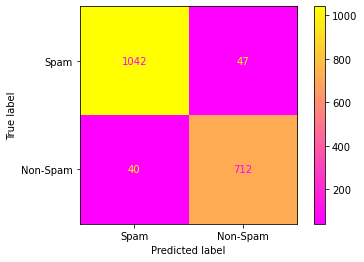

In [67]:
plot_confusion_matrix(xgb_clf_final, X_test, y_test,
                      cmap = 'spring',
                     display_labels=['Spam', 'Non-Spam'])
plt.show()

In [69]:
# ax= plt.subplot()
# sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt=''); #annot=True to annotate cells

# # labels, title and ticks
# ax.set_xlabel('Predicted labels');
# ax.set_ylabel('True labels'); 
# ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

The number False Positives (47) and False Negatives (40) is very close in the confusion matrix.

Majority of the predictions made by the model are correct. (95%)

In [70]:
# Classification Report for best model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1089
           1       0.94      0.95      0.94       752

    accuracy                           0.95      1841
   macro avg       0.95      0.95      0.95      1841
weighted avg       0.95      0.95      0.95      1841



The Overall Accuracy is 95% of of the Test Dataset, which is pretty good.

Recall and precision are 94% and 95% to for classifying a Spam email.

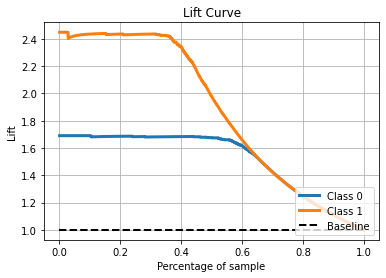

In [72]:
import scikitplot as skplt

# Plot the lift curve

y_prob = xgb_clf_final.predict_proba(X_test)

skplt.metrics.plot_lift_curve(y_test, y_prob)
plt.show() 

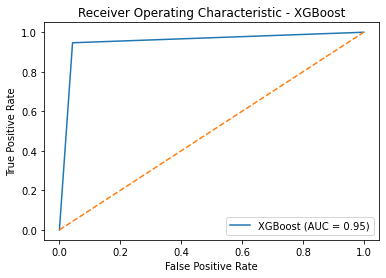

In [74]:
# Plot ROC curve

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, multilabel_confusion_matrix

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr) 
display = RocCurveDisplay(fpr=fpr, tpr=tpr,
                          roc_auc=roc_auc,
                          estimator_name="XGBoost")

display.plot()
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic - XGBoost')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The ROC curve of the XGBoost Model is close to a perfect classifier. It performs much better than a random classifier.

## Performance Discussion

Performance Discussion (Write-up)

The order of best performing models is (when we are concerned with Precision):

1. XGBoost (92.4%)
3. SVM (90.7%)
2. Neural Networks (92.1%)
4. Logistic Regression (88.9%)
5. K Nearest Neighbor (88.8%)
6. Decision Trees (83.9%)

The algorithms based on iterative learning like XGBoost and Neural Networks performed the best for overall accuracy with XGBoost being a clear winner. The simpler models like KNN, Deicision trees and Logistic Regression don't perform as well but still have reasonable accuracies and precision scores.